# Gun Violence Analysis By: Shangeeth Uthayakumar

__In this file we will analyze the data which contains all kinds of gun related casualties on various states in Central America. My goal is to make the data useful and understandable for those who want to bring a change for the better relating to gun violence.__

__As all data files, we have to import all the packages we will be using to create a good data visualization of what we are dealing with.__

In [2]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
sns.set(style="darkgrid")

__Now we need to make our file readable in python. We will use the following input to read the csv file with all the data.__

In [3]:
dataframe = pd.read_csv('GunViolence.csv')

__Next, we will take a look at the data we are dealing with to get an idea of how to analyze the data.__ 

__Let's first see the first few data inputs from the top.__

In [4]:
dataframe.head(5)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


__As you can see, we have various types of information including the id, date, state, city/county and many more. This can be used towards our analysis.__ 

__We will also look at the last entries of data for reference later to confirm where the data ends.__

In [4]:
dataframe.tail(5)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,...,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.com/news/houston-texas/houst...,False,...,0::42,0::Adult 18+,0::Male,0::Leroy Ellis,NaN,0::Killed,0::Victim,http://www.khou.com/article/news/hpd-investiga...,149.0,17.0
239676,1081940,2018-03-31,Maine,Norridgewock,434 Skowhegan Rd,2,0,http://www.gunviolencearchive.org/incident/108...,https://www.centralmaine.com/2018/03/31/police...,False,...,0::58||1::62,0::Adult 18+||1::Adult 18+,0::Female||1::Male,0::Marie Lancaster Hale||1::William Hale,1::Significant others - current or former,0::Killed||1::Killed,0::Victim||1::Subject-Suspect,https://www.centralmaine.com/2018/03/31/police...,111.0,3.0


__The entries end at rows 239,676. In total we have about 239,677 rows.__

__Next we will confirm our statement from above with the shape method to find out how many columns and rows are in our dataframe.__

In [5]:
dataframe.shape

(239677, 29)

__We have a total of 239677 rows and 29 columns in our dataframe.__

__We have about 29 columns so we want to figure out what these columns are in more detail. With the info method, we can also see how many entries are in each column.__

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
incident_id                    239677 non-null int64
date                           239677 non-null object
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        223180 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
incident_characteristics       239351 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude                    

__Now we have a list of all the columns we will deal with in our dataframe so it will be easier to analyze.__

__Next, we want to see if there are many empty entries and we will decide on whether it will affect our analysis and if we should eliminate the whole row.__

In [6]:
dataframe.isnull().any()

incident_id                    False
date                           False
state                          False
city_or_county                 False
address                         True
n_killed                       False
n_injured                      False
incident_url                   False
source_url                      True
incident_url_fields_missing    False
congressional_district          True
gun_stolen                      True
gun_type                        True
incident_characteristics        True
latitude                        True
location_description            True
longitude                       True
n_guns_involved                 True
notes                           True
participant_age                 True
participant_age_group           True
participant_gender              True
participant_name                True
participant_relationship        True
participant_status              True
participant_type                True
sources                         True
s

__We don't see anything we should eliminate because the empty values are not that important to the analysis so we will just leave it as it is.__

__Next we will use the describe method to get some statistical values for us to analyze.__

In [7]:
dataframe.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


__From this chart, most of the values are not accurate because there are many "zero" values. We can confirm this because the minimum values in "n_killed" and "n_injured" are zero. For "n_killed" we have a maximum value of 50 which means that one entry has 50 kills in an incident. There is also 53 injured in another entry in another incident.__ 

__Before we count the states, we need to see if all the states in the U.S.A is recorded in the data set.__

In [15]:
len(dataframe['state'].unique())

51

__There are 51 recorded states in the data set. This data set is fair as it includes all the states in the U.S.A.__

__When looking at the dataset, I figured that it will be easier to just look at the states individually so we could get a better idea of what states has the most incidents compared to eachother. We will use the "value_counts" method to achieve this.__

In [14]:
dataframe['state'].value_counts()

Illinois                17556
California              16306
Florida                 15029
Texas                   13577
Ohio                    10244
New York                 9712
Pennsylvania             8929
Georgia                  8925
North Carolina           8739
Louisiana                8103
Tennessee                7626
South Carolina           6939
Missouri                 6631
Michigan                 6136
Massachusetts            5981
Virginia                 5949
Indiana                  5852
Maryland                 5798
Alabama                  5471
New Jersey               5387
Wisconsin                4787
Kentucky                 4157
Mississippi              3599
Oklahoma                 3455
Washington               3434
Colorado                 3201
District of Columbia     3195
Connecticut              3067
Arkansas                 2842
Iowa                     2517
Minnesota                2408
Arizona                  2328
Oregon                   2286
Kansas    

__We have a very long list of states. We can now clearly see the amount of incidents in each state.__

__Now let's see the states with the largest and the smallest amount of incidents.__

In [ ]:
dataframe['state'].value_counts().nlargest(10)

Illinois          17556
California        16306
Florida           15029
Texas             13577
Ohio              10244
New York           9712
Pennsylvania       8929
Georgia            8925
North Carolina     8739
Louisiana          8103
Name: state, dtype: int64

__As you can see, Illinois has 17556 incidents.__ 

In [ ]:
dataframe['state'].value_counts().nsmallest(10)

Hawaii           289
Vermont          472
Wyoming          494
South Dakota     544
North Dakota     573
Montana          638
Idaho            661
Rhode Island     895
Maine            907
New Hampshire    964
Name: state, dtype: int64

__Hawaii has the least amount of gun related incidents in the U.S.A which can mean that they are the safest state from the data set.__

__One thing I noticed in the data column is that it is hard to tell what the date is so I thought it would be better to just add another two columns which states the year and the exact month. This will make it easier for other users to read my data.__

In [17]:
dataframe['date'] = pd.to_datetime(dataframe['date'])

__Using the "to_datetime" format will convert the argument in the column to datetime format.__

In [18]:
dataframe['year'] = dataframe['date'].dt.year

__We will receive the year portion of the argument and put that into our newly made column named "Year"__

In [22]:
dataframe['month'] = dataframe['date'].dt.month

__We will receive the month portion of the argument and put that into our newly made column named "Month"__

__Since the month's will only be listed as numbers, it will be easier to just convert them to a named month. Below I created a dictionary with all the months with their corresponding numbers as they would appear in the data set.__

In [89]:
Month_Name = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December',    
}

In [90]:
dataframe['Month'] = dataframe['month'].map(Month_Name)

__Now we will check our newly added columns in our dataset.__

In [92]:
dataframe

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month,Month
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013,1,January
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013,1,January
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,2013,1,January
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,2013,1,January
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,2013,1,January
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0,2013,1,January
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0,2013,1,January
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.huffingtonpost.com/2013/01/21/new-o...,93.0,5.0,2013,1,January
8,479389,2013-01-21,California,Brentwood,1100 block of Breton Drive,0,4,http://www.gunviolencearchive.org/incident/479389,http://sanfrancisco.cbslocal.com/2013/01/22/4-...,False,...,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.contracostatimes.com/ci_22426767/br...,11.0,7.0,2013,1,January
9,492151,2013-01-23,Maryland,Baltimore,1500 block of W. Fayette St.,1,6,http://www.gunviolencearchive.org/incident/492151,http://www.abc2news.com/news/crime-checker/bal...,False,.

__Next we will look at some data visually through graphs so can get an idea where all the states are with their gun incidents compared to each other.__

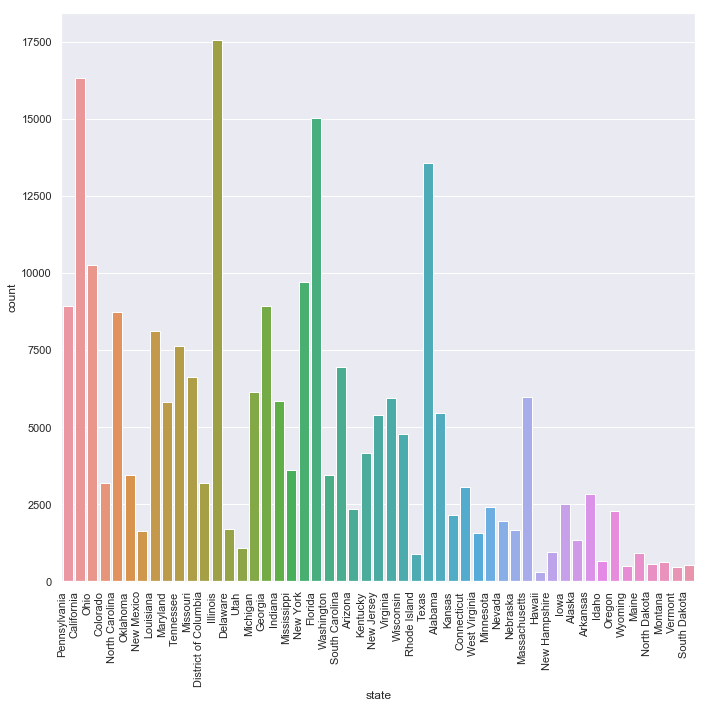

In [47]:
p=sns.countplot(x='state', data=dataframe)
p.set_xticklabels(p.get_xticklabels(), rotation=90, ha="right")
sns.set(rc={'figure.figsize':(5,5)})
plt.tight_layout()
plt.show()

__Based on what we see above, we can see that Illinois, California, Florida, and Texas all have a great lead apart from the other states which is very concerning according to the graph. When you compare them to the states with the least amount of incidents, there is a large difference between them.__

__Next, I want to see what gun types have the most amount of incidents compared to each other. To achieve this, we will use the value_counts method specified by the 'gun type' column.__

In [51]:
dataframe['gun_type'].value_counts()

0::Unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

__As you can see above, there are many unrecorded gun types with a lead of 93,559 incidents from there followed by handguns with 13,018 incidents.__

__Next I wanted to see the percentage each state occupies against eachother in terms of gun incidents in the whole data set. Here we will use the "normalize" and the "value_counts" function to show the states in percentage. We will multiply each value by 100 to match up to a percentages.__


In [60]:
dataframe['state'].value_counts(normalize=True)*100

Illinois                7.324858
California              6.803323
Florida                 6.270522
Texas                   5.664707
Ohio                    4.274086
New York                4.052120
Pennsylvania            3.725430
Georgia                 3.723762
North Carolina          3.646157
Louisiana               3.380800
Tennessee               3.181782
South Carolina          2.895146
Missouri                2.766640
Michigan                2.560112
Massachusetts           2.495442
Virginia                2.482090
Indiana                 2.441619
Maryland                2.419089
Alabama                 2.282655
New Jersey              2.247608
Wisconsin               1.997271
Kentucky                1.734418
Mississippi             1.501604
Oklahoma                1.441523
Washington              1.432762
Colorado                1.335547
District of Columbia    1.333044
Connecticut             1.279639
Arkansas                1.185763
Iowa                    1.050163
Minnesota 

__Above we can see that 7.32% of all the incidents is occupied by Illinois followed by California at 6.80%. The last on the list are as expected, Wyoming at 0.20%, Vermont at 0.19%, and Hawaii at 0.12%.__

__Next I want to see the distributions of all the data on a histogram. Here we can see how distributed the incidents. First we will load up the data that will be used.__

In [64]:
q = dataframe['state'].value_counts().unique()
q

array([17556, 16306, 15029, 13577, 10244,  9712,  8929,  8925,  8739,
        8103,  7626,  6939,  6631,  6136,  5981,  5949,  5852,  5798,
        5471,  5387,  4787,  4157,  3599,  3455,  3434,  3201,  3195,
        3067,  2842,  2517,  2408,  2328,  2286,  2145,  1952,  1685,
        1651,  1645,  1575,  1349,  1072,   964,   907,   895,   661,
         638,   573,   544,   494,   472,   289], dtype=int64)

__Now let's load the histogram based off of this data.__

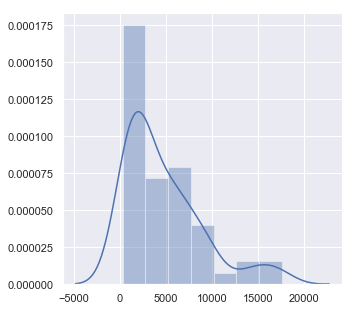

In [66]:
sns.distplot(q)

__As you can see from the chart, the data is mostly distributed from values 0-5,000 incidents. This could be good as we now that most incidents that occured in the states were relatively low. From 5,000-10,000, there are less incidents but it is still quite significant. After 10,000 there are is less distribution and this is occupied by the states with the most incidents.__

__Now I want to see the amount of incidents from a yearly perspective. This can be useful to see if there are any notable trends over the years. First we will load up the data with the "year" column we made.__

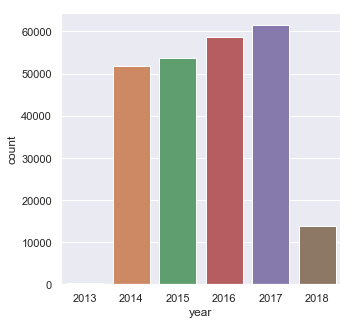

In [68]:
sns.countplot(x='year', data=dataframe)

__One trend we can notice from the graph is that it seems to get higher every year onwards. 2018 may have some missing data or is not updated to the current date so I am not going to count that into the trend. This is not a good observation because there is continued gun violence every year with no efforts being made to prevent it. It is obvious the U.S.A is not doing much to prevent this.__

__Now I want to see the people killed per year in another kind of graph. I will use the voilin graph because t shows more than a box plot in terms of distribution.__

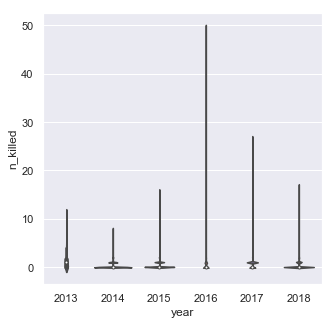

In [69]:
sns.violinplot('year', 'n_killed',data=dataframe)

__Here we can see that the number of people killed in the U.S.A is the most in 2016. It seems to have gotten lower after 2016 onwards. Most incidents seem to be more distributed towards 0-10 kills in every year. This is true according to the data.__

__Next I want to show a pie graph with all the counted incidents in every state. First we will load up the data and load up the new dataframe.__

In [75]:
state_count = dataframe['state'].value_counts()
state_cases = pd.DataFrame({'labels':state_count.index, 'values':state_count.values})

__Next we check if we loaded the data in properly by checking the first 20 states.__

In [83]:
state_cases.iloc[:20]

,labels,values
0,Illinois,17556
1,California,16306
2,Florida,15029
3,Texas,13577
4,Ohio,10244
5,New York,9712
6,Pennsylvania,8929
7,Georgia,8925
8,North Carolina,8739
9,Louisiana,8103


__Now we will display our pie graph to observe all the states with incidents in pie graph format.__

([<matplotlib.patches.Wedge at 0x2c30604d080>,
 [Text(1.0710036360063058, 0.2509008004396808, 'Illinois'),
  Text(0.8594872005801634, 0.6864996373188221, 'California'),
  Text(0.5139015605223355, 0.9725765708121437, 'Florida'),
  Text(0.12200901622477789, 1.0932126051047262, 'Texas'),
  Text(-0.21971165422951472, 1.0778343049818604, 'Ohio'),
  Text(-0.4909687989421393, 0.9843523954688755, 'New York'),
  Text(-0.7145153517452902, 0.8363419229718813, 'Pennsylvania'),
  Text(-0.8889804186036859, 0.6478532359564283, 'Georgia'),
  Text(-1.0139213818410249, 0.42657171899410606, 'North Carolina'),
  Text(-1.0827214626157253, 0.1942015303525306, 'Louisiana'),
  Text(-1.0995472377839561, -0.03155743781855792, 'Tennessee'),
  Text(-1.073581966462919, -0.23962838163625838, 'South Carolina'),
  Text(-1.014245419533821, -0.42580069158546857, 'Missouri'),
  Text(-0.9291534706242567, -0.5887901392065757, 'Michigan'),
  Text(-0.8243370943353431, -0.7283325853638322, 'Massachusetts'),
  Text(-0.7008504

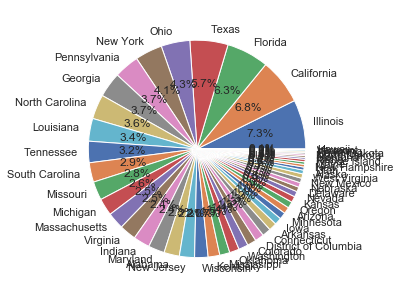

In [99]:
plt.pie(state_cases['values'], labels = state_cases['labels'], autopct = '%1.1f%%')

__As you can see we now have a clear observation of all the states. As we noted before, Illinois holds 7.3% followed by California with 6.8%.__

__Now I will use the "group by" method to bring toegther the "n_killed" and the "n_injured" data together in one dataset. I did this because I want to only look at both of those data in one graph. It would be helpful for analysis.__

In [86]:
data_st = dataframe.groupby('state').aggregate({'n_killed':np.sum, 'n_injured':np.sum}).reset_index()

__Now I want to see how this data frame is displayed.__

In [87]:
data_st

,state,n_killed,n_injured
0,Alabama,1880,2998
1,Alaska,267,325
2,Arizona,1094,1096
3,Arkansas,773,1347
4,California,5562,7644
5,Colorado,796,1133
6,Connecticut,341,1258
7,Delaware,217,853
8,District of Columbia,459,1415
9,Florida,3909,7072


__Next, I want to look at a plot which has both data from "n_killed" and "n_injured". A joint plot is the best kind of plot to be able to achieve this.__

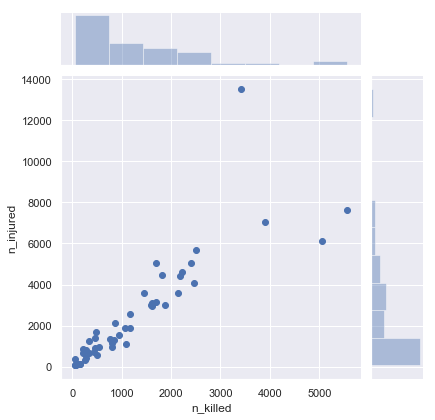

In [88]:
sns.jointplot("n_killed","n_injured", data_st, )

__From the graph, we can see that the graph is mostly dispersed towards the bottom left corner which ranges from 0-1000 for "n-killed" and 0-2000 for "n_injured" as expected. There are also many outliers in the plot which have above 5,000 "n_killed" and even about 13,000 "n_injured".__ 

__This concludes my data analysis for gun violence. I hope you learned a lot about the gun violence in the U.S.A and how there needs to be some changes made to the gun laws. Some states such as Illinois, California, and Florida, have more gun incidents compared to other states in the U.S.A. There is a lot more that needs to be known within these states to make these changes but I hope this file can be a basis for some decisions to be made.__  

__Thank you for looking at my data analysis file on Gun Violence.__